In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree




In [2]:

# Baca data langsung dari URL
url = 'https://raw.githubusercontent.com/sergiohalim/data_mining-/refs/heads/main/diabetes.csv'
df = pd.read_csv(url)

# Lihat beberapa baris pertama dari dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


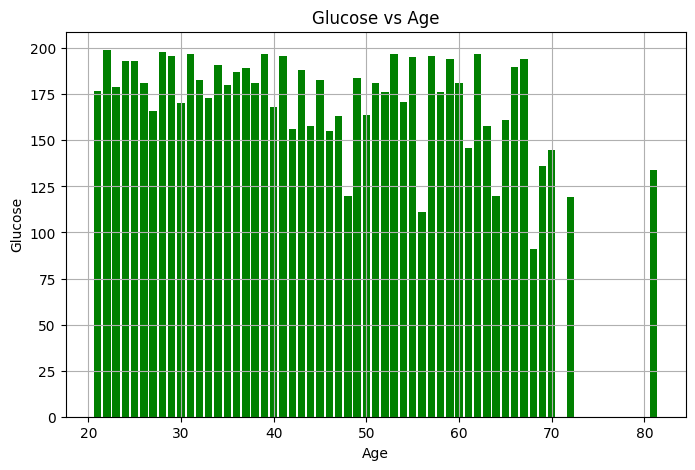

In [6]:
# Mengubah scatter plot menjadi bar plot
plt.figure(figsize=(8,5))
plt.bar(df['Age'], df['Glucose'], color='green')
plt.title('Glucose vs Age')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.grid(True)
plt.show()


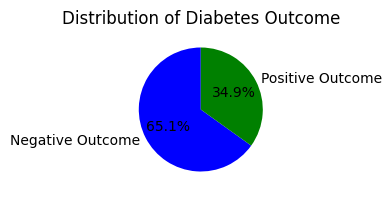

In [7]:
labels = ['Negative Outcome', 'Positive Outcome']
outcome_counts = df['Outcome'].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(2,6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'green'])
plt.title('Distribution of Diabetes Outcome')
plt.show()

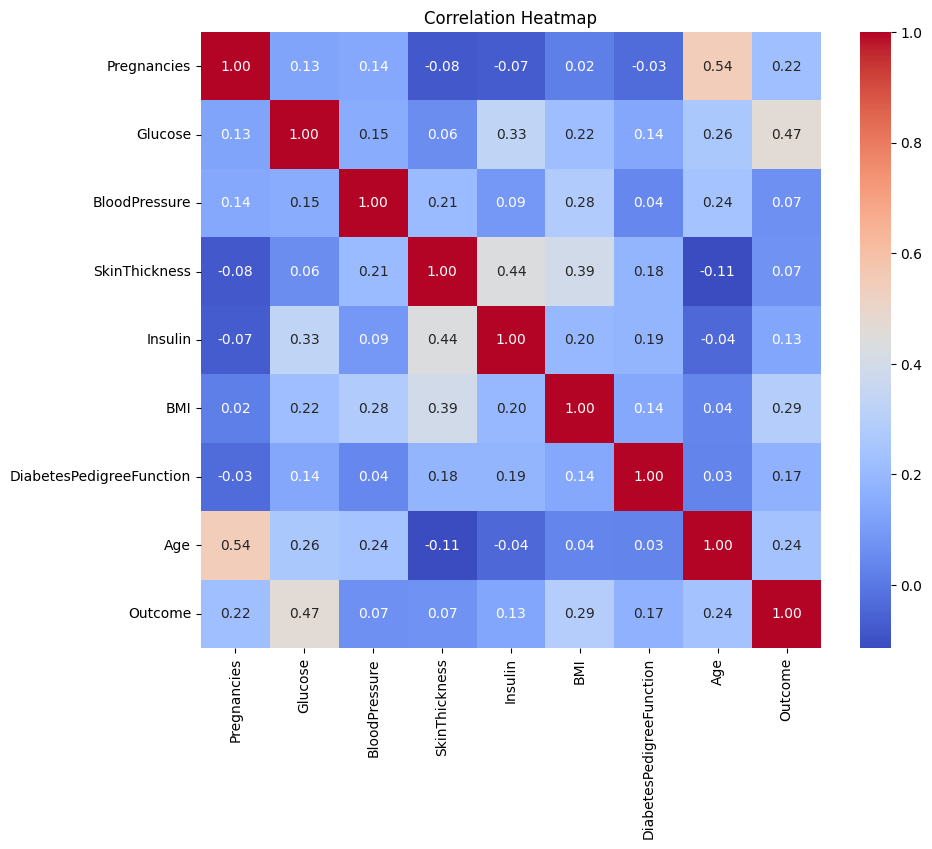

In [8]:

correlation_matrix = df.corr() #calculate the correlation between numeric columns in the DataFrame df using the .corr() method
plt.figure(figsize=(10, 8)) #set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #create a heatmap using the previously calculated correlation matrix
plt.title("Correlation Heatmap") #title
plt.show() #display the heatmap


SPLITING X & **Y**

In [ ]:
# Alternatif penulisan dengan pemisahan X dan y
x = df.loc[:, df.columns != 'Outcome']  # Memilih semua kolom kecuali 'Outcome'
y = df.loc[:, 'Outcome']  # Memilih kolom 'Outcome' saja


In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:

x_train.shape, x_test.shape

((614, 8), (154, 8))

DESICION **TREE**

In [13]:
#Criterion Entropy
#a
clf_entro = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_entro.fit(x_train, y_train)

#the code shows the model of decision tree classifier

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [14]:

#b
y_pred_entro = clf_entro.predict(x_test)

#using the split data that i already done before

In [15]:

print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entro)))

Model accuracy score with criterion entropy: 0.7662


In [16]:

print('Training set score: {0:0.4f}' .format(clf_entro.score(x_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_entro.score(x_test, y_test)))

Training set score: 0.7752
Test set score: 0.7662


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples

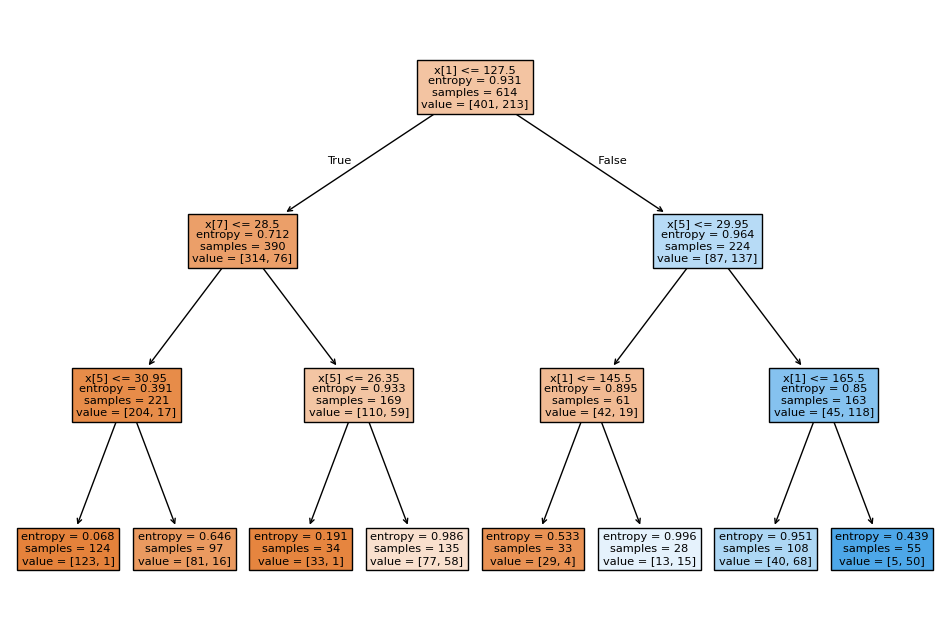

In [17]:

plt.figure(figsize = (12,8))
tree.plot_tree(clf_entro.fit(x_train, y_train), filled = True)

Criterian Gini **Index**

In [18]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [19]:

y_pred_gini = clf_gini.predict(x_test)

In [20]:

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7597


In [21]:

#d
print('Training set score: {0:0.4f}' .format(clf_gini.score(x_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_gini.score(x_test, y_test)))

Training set score: 0.7769
Test set score: 0.7597


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(

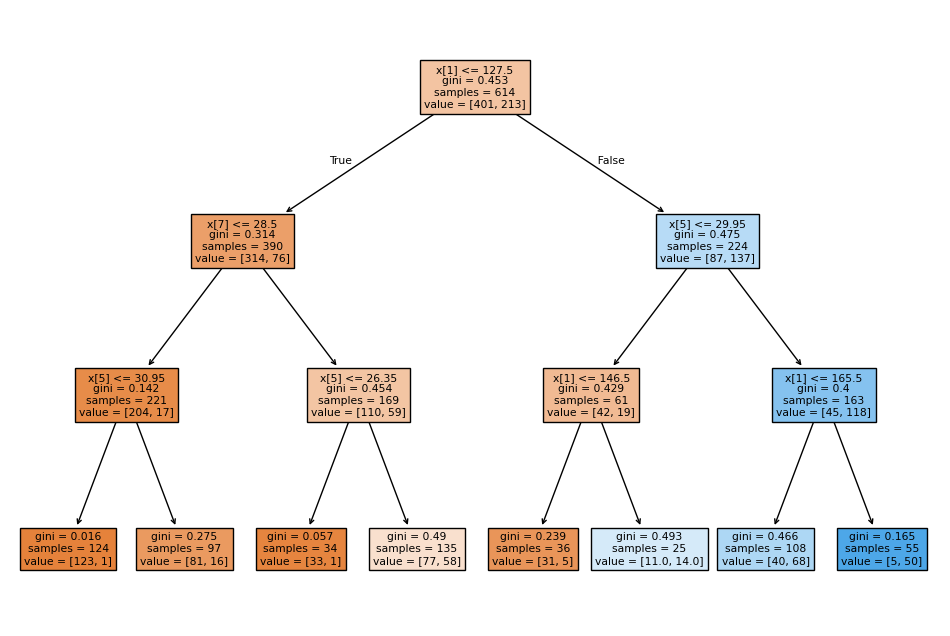

In [22]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train), filled = True)